<a href="https://colab.research.google.com/github/ivydey/MCA_PROJECT/blob/main/Manshi_Shaw_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
#loading the dataset
df=pd.read_csv('/content/Thyroid_Diff.csv')

In [ ]:
#print first 5 entries of the dataset
df.head(15)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df.shape

(383, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
#check for number of missing(NUll) values
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
# to display no. of samples on each class
df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
F    312
M     71
Name: count, dtype: int64

In [ ]:
df.columns


Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [ ]:
df['Smoking'].value_counts()

No     334
Yes     49
Name: Smoking, dtype: int64

In [ ]:
df['Hx Smoking'].value_counts()

No     355
Yes     28
Name: Hx Smoking, dtype: int64

In [ ]:
df['Hx Radiothreapy'].value_counts()

No     376
Yes      7
Name: Hx Radiothreapy, dtype: int64

In [ ]:
df['Thyroid Function'].value_counts()

Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: Thyroid Function, dtype: int64

In [ ]:
df['Physical Examination'].value_counts()

Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: Physical Examination, dtype: int64

In [ ]:
df['Risk'].value_counts()

Low             249
Intermediate    102
High             32
Name: Risk, dtype: int64

In [ ]:
df['Adenopathy'].value_counts()


No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: Adenopathy, dtype: int64

In [ ]:
#df['Adenopathy'].value_counts()
df['Pathology'].value_counts()


Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: Pathology, dtype: int64

In [ ]:
df['Focality'].value_counts()

Uni-Focal      247
Multi-Focal    136
Name: Focality, dtype: int64

In [ ]:
df['T'].value_counts()

T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: T, dtype: int64

In [ ]:
df['N'].value_counts()

N0     268
N1b     93
N1a     22
Name: N, dtype: int64

In [ ]:
df['M'].value_counts()

M0    365
M1     18
Name: M, dtype: int64

In [ ]:
df['Stage'].value_counts()

I      333
II      32
IVB     11
III      4
IVA      3
Name: Stage, dtype: int64

In [ ]:
df['Response'].value_counts()

Response
Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64

In [ ]:
label_encoder=LabelEncoder()
df['Recurred']=label_encoder.fit_transform(df['Recurred'])
df['Smoking']=label_encoder.fit_transform(df['Smoking'])
#df['M']=label_encoder.fit_transform(df['M'])


In [ ]:
# encoding Column
df.replace({'Hx Smoking':{'Yes':1,'No':0}},inplace=True)
df.replace({'Hx Radiothreapy':{'Yes':1,'No':0}},inplace=True)
df.replace({'Focality':{'Uni-Focal':0,'Multi-Focal':1}},inplace=True)

In [ ]:
x=df.drop(['Recurred'],axis=1)
y=df['Recurred']

In [ ]:
print(type(x))
#print(x)

<class 'pandas.core.frame.DataFrame'>


In [ ]:
x.dtypes

Age                      int64
Gender                  object
Smoking                  int64
Hx Smoking               int64
Hx Radiothreapy          int64
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                 int64
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
dtype: object

In [ ]:
#applying one hot encoding with pandas
x=pd.get_dummies(x,dtype=int)

In [ ]:
print(x.head())
x.shape
x.dtypes

   Age  Smoking  Hx Smoking  Hx Radiothreapy  Focality  Gender_F  Gender_M  \
0   27        0           0                0         0         1         0   
1   34        0           1                0         0         1         0   
2   30        0           0                0         0         1         0   
3   62        0           0                0         0         1         0   
4   62        0           0                0         1         1         0   

   Thyroid Function_Clinical Hyperthyroidism  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Thyroid Function_Clinical Hypothyroidism  Thyroid Function_Euthyroid  ...  \
0                                         0                           1  ...   
1                                         0                           1  ...   
2 

Age                                                 int64
Smoking                                             int64
Hx Smoking                                          int64
Hx Radiothreapy                                     int64
Focality                                            int64
Gender_F                                            int64
Gender_M                                            int64
Thyroid Function_Clinical Hyperthyroidism           int64
Thyroid Function_Clinical Hypothyroidism            int64
Thyroid Function_Euthyroid                          int64
Thyroid Function_Subclinical Hyperthyroidism        int64
Thyroid Function_Subclinical Hypothyroidism         int64
Physical Examination_Diffuse goiter                 int64
Physical Examination_Multinodular goiter            int64
Physical Examination_Normal                         int64
Physical Examination_Single nodular goiter-left     int64
Physical Examination_Single nodular goiter-right    int64
Adenopathy_Bil

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 383, dtype: int64


In [ ]:
test_sizes = [0.10,0.20,0.30]
print(test_sizes)

[0.1, 0.2, 0.3]


In [ ]:
#from sklearn.metrics import accuracy_score
for test_size in test_sizes:
  accuracies=[]
  for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size,random_state=None)
    # knn - k-nearest neighbours
    knn_model=KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(x_train,y_train)

    # print metric to get performance
    # Predict using the trained model
    predicted_knn = knn_model.predict(x_test)
    #predicted_svm = svm_model.predict(x_test)
    expected = y_test
    # Print accuracy score for knn
    accuracy= accuracy_score(expected, predicted_knn) * 100
    accuracies.append(accuracy)
    print(f'  Accuracy of knn for simulation {i + 1}: {accuracy:.2f}%')
    #calculate confusion matrix
    knn_cm=confusion_matrix(y_test,predicted_knn)

  #knn
  mean_accuracy = np.mean(accuracies)
  variance_accuracy = np.var(accuracies)
  std_dev_accuracy = np.std(accuracies)

  print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
  print(f'Variance of Accuracy: {variance_accuracy:.2f}')
  print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
  print(f"Confusion Matrix:")
  print(knn_cm)




  Accuracy of knn for simulation 1: 85.71%
  Accuracy of knn for simulation 2: 83.12%
  Accuracy of knn for simulation 3: 88.31%
  Accuracy of knn for simulation 4: 84.42%
  Accuracy of knn for simulation 5: 87.01%
  Accuracy of knn for simulation 6: 90.91%
  Accuracy of knn for simulation 7: 93.51%
  Accuracy of knn for simulation 8: 88.31%
  Accuracy of knn for simulation 9: 84.42%
  Accuracy of knn for simulation 10: 85.71%
  Accuracy of knn for simulation 11: 88.31%
  Accuracy of knn for simulation 12: 92.21%
  Accuracy of knn for simulation 13: 85.71%
  Accuracy of knn for simulation 14: 89.61%
  Accuracy of knn for simulation 15: 88.31%
  Accuracy of knn for simulation 16: 90.91%
  Accuracy of knn for simulation 17: 87.01%
  Accuracy of knn for simulation 18: 85.71%
  Accuracy of knn for simulation 19: 90.91%
  Accuracy of knn for simulation 20: 89.61%

Mean Accuracy: 87.99%
Variance of Accuracy: 7.57
Standard Deviation of Accuracy: 2.75

Confusion Matrix:
[[54  1]
 [ 7 15]]
  Ac

In [ ]:
#from sklearn.metrics import accuracy_score
for test_size in test_sizes:
    print(f"\nTest size: {test_size}")
    accuracies = []  # Store accuracy scores for each iteration

    for i in range(20):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

        # SVM
        svm_model = SVC(kernel='linear')
        svm_model.fit(x_train, y_train)

        # Predict using the trained model
        predicted = svm_model.predict(x_test)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted) * 100
        accuracies.append(accuracy)

        print(f'  Accuracy of svm for simulation {i + 1}: {accuracy:.2f}%')
        #calculate confusion matrix
        svm_cm=confusion_matrix(y_test,predicted)

    # Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
    print(f"Confusion Matrix:")
    print(svm_cm)


Test size: 0.1
  Accuracy of svm for simulation 1: 97.44%
  Accuracy of svm for simulation 2: 94.87%
  Accuracy of svm for simulation 3: 97.44%
  Accuracy of svm for simulation 4: 94.87%
  Accuracy of svm for simulation 5: 97.44%
  Accuracy of svm for simulation 6: 97.44%
  Accuracy of svm for simulation 7: 100.00%
  Accuracy of svm for simulation 8: 92.31%
  Accuracy of svm for simulation 9: 94.87%
  Accuracy of svm for simulation 10: 100.00%
  Accuracy of svm for simulation 11: 92.31%
  Accuracy of svm for simulation 12: 97.44%
  Accuracy of svm for simulation 13: 87.18%
  Accuracy of svm for simulation 14: 100.00%
  Accuracy of svm for simulation 15: 94.87%
  Accuracy of svm for simulation 16: 94.87%
  Accuracy of svm for simulation 17: 94.87%
  Accuracy of svm for simulation 18: 100.00%
  Accuracy of svm for simulation 19: 94.87%
  Accuracy of svm for simulation 20: 97.44%

Mean Accuracy: 96.03%
Variance of Accuracy: 9.52
Standard Deviation of Accuracy: 3.08

Confusion Matrix:
[[2

In [ ]:

from sklearn.metrics import accuracy_score
for test_size in test_sizes:
    print(f"\nTest size: {test_size}")
    accuracies = []  # Store accuracy scores for each iteration

    for i in range(20):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

        # SVM
        svm_model = SVC(kernel='rbf')
        svm_model.fit(x_train, y_train)

        # Predict using the trained model
        predicted = svm_model.predict(x_test)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted) * 100
        accuracies.append(accuracy)

        print(f'  Accuracy of svm for simulation {i + 1}: {accuracy:.2f}%')
        #calculate confusion matrix
        svm_cm=confusion_matrix(y_test,predicted)

    # Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
    print(f"Confusion Matrix:")
    print(svm_cm)




Test size: 0.1
  Accuracy of svm for simulation 1: 82.05%
  Accuracy of svm for simulation 2: 69.23%
  Accuracy of svm for simulation 3: 82.05%
  Accuracy of svm for simulation 4: 74.36%
  Accuracy of svm for simulation 5: 76.92%
  Accuracy of svm for simulation 6: 66.67%
  Accuracy of svm for simulation 7: 82.05%
  Accuracy of svm for simulation 8: 69.23%
  Accuracy of svm for simulation 9: 76.92%
  Accuracy of svm for simulation 10: 69.23%
  Accuracy of svm for simulation 11: 71.79%
  Accuracy of svm for simulation 12: 71.79%
  Accuracy of svm for simulation 13: 82.05%
  Accuracy of svm for simulation 14: 76.92%
  Accuracy of svm for simulation 15: 61.54%
  Accuracy of svm for simulation 16: 79.49%
  Accuracy of svm for simulation 17: 66.67%
  Accuracy of svm for simulation 18: 69.23%
  Accuracy of svm for simulation 19: 84.62%
  Accuracy of svm for simulation 20: 74.36%

Mean Accuracy: 74.36%
Variance of Accuracy: 39.45
Standard Deviation of Accuracy: 6.28

Confusion Matrix:
[[29  

In [ ]:
print(x_train)

     Age  Smoking  Hx Smoking  Hx Radiothreapy  Focality  Gender_F  Gender_M  \
89    31        1           0                0         1         0         1   
248   52        1           0                0         1         1         0   
137   32        0           0                0         0         1         0   
32    36        0           0                0         0         1         0   
320   80        1           0                0         1         1         0   
..   ...      ...         ...              ...       ...       ...       ...   
274   28        1           0                0         0         0         1   
237   36        0           0                0         0         0         1   
259   48        0           0                0         1         1         0   
235   60        0           0                0         1         1         0   
297   61        0           0                0         0         1         0   

     Thyroid Function_Clinical Hyperthy

In [ ]:
print(x_test)

     Age  Smoking  Hx Smoking  Hx Radiothreapy  Focality  Gender_F  Gender_M  \
250   30        0           0                0         0         1         0   
86    73        0           0                0         0         1         0   
355   32        0           0                0         1         1         0   
80    27        0           0                0         0         1         0   
17    44        0           0                0         0         1         0   
..   ...      ...         ...              ...       ...       ...       ...   
186   30        0           0                0         0         1         0   
339   48        0           0                0         1         1         0   
359   35        0           0                0         1         1         0   
329   56        0           0                0         1         1         0   
78    35        0           0                0         0         1         0   

     Thyroid Function_Clinical Hyperthy

In [ ]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)



In [ ]:
print(x_train)

[[ 0.9947906  -0.36514837 -0.29172998 ... -1.12546287 -0.42062225
   1.80277564]
 [ 0.60791588 -0.36514837 -0.29172998 ... -1.12546287  2.37743011
  -0.5547002 ]
 [ 0.73687412  2.73861279 -0.29172998 ...  0.88852332 -0.42062225
  -0.5547002 ]
 ...
 [-0.81062474 -0.36514837 -0.29172998 ...  0.88852332 -0.42062225
  -0.5547002 ]
 [-0.23031267 -0.36514837 -0.29172998 ... -1.12546287 -0.42062225
   1.80277564]
 [ 0.02760381 -0.36514837 -0.29172998 ...  0.88852332 -0.42062225
  -0.5547002 ]]


In [ ]:
x_test_scaled=sc.transform(x_test)
print(x_test_scaled)

[[-1.06854122 -0.36514837 -0.29172998 ... -1.12546287 -0.42062225
  -0.5547002 ]
 [ 1.96197738  2.73861279 -0.29172998 ... -1.12546287 -0.42062225
   1.80277564]
 [-0.03687531 -0.36514837 -0.29172998 ... -1.12546287 -0.42062225
   1.80277564]
 ...
 [-0.16583355 -0.36514837 -0.29172998 ...  0.88852332 -0.42062225
  -0.5547002 ]
 [-1.0040621  -0.36514837 -0.29172998 ...  0.88852332 -0.42062225
  -0.5547002 ]
 [ 0.672395   -0.36514837 -0.29172998 ...  0.88852332 -0.42062225
  -0.5547002 ]]



Test size: 0.1
  Accuracy of knn for simulation1 : 94.87%
  Accuracy of knn for simulation2 : 94.87%
  Accuracy of knn for simulation3 : 94.87%
  Accuracy of knn for simulation4 : 94.87%
  Accuracy of knn for simulation5 : 94.87%
  Accuracy of knn for simulation6 : 94.87%
  Accuracy of knn for simulation7 : 94.87%
  Accuracy of knn for simulation8 : 94.87%
  Accuracy of knn for simulation9 : 94.87%
  Accuracy of knn for simulation10 : 94.87%
  Accuracy of knn for simulation11 : 94.87%
  Accuracy of knn for simulation12 : 94.87%
  Accuracy of knn for simulation13 : 94.87%
  Accuracy of knn for simulation14 : 94.87%
  Accuracy of knn for simulation15 : 94.87%
  Accuracy of knn for simulation16 : 94.87%
  Accuracy of knn for simulation17 : 94.87%
  Accuracy of knn for simulation18 : 94.87%
  Accuracy of knn for simulation19 : 94.87%
  Accuracy of knn for simulation20 : 94.87%
  Accuracy of knn for simulation21 : 94.87%

Mean Accuracy: 94.87%
Variance of Accuracy: 0.00
Standard Deviation 

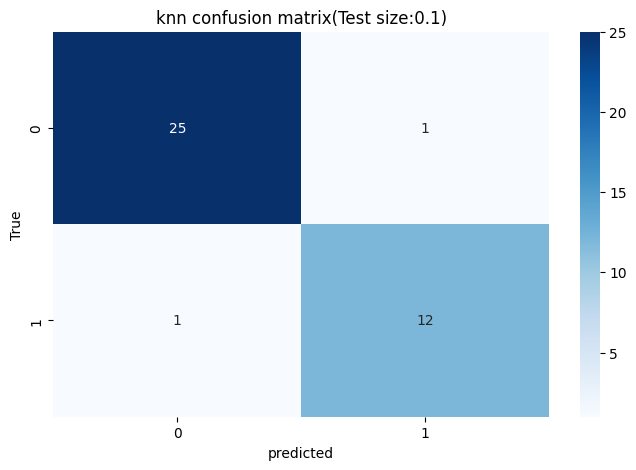


Test size: 0.2
  Accuracy of knn for simulation1 : 90.91%
  Accuracy of knn for simulation2 : 90.91%
  Accuracy of knn for simulation3 : 90.91%
  Accuracy of knn for simulation4 : 90.91%
  Accuracy of knn for simulation5 : 90.91%
  Accuracy of knn for simulation6 : 90.91%
  Accuracy of knn for simulation7 : 90.91%
  Accuracy of knn for simulation8 : 90.91%
  Accuracy of knn for simulation9 : 90.91%
  Accuracy of knn for simulation10 : 90.91%
  Accuracy of knn for simulation11 : 90.91%
  Accuracy of knn for simulation12 : 90.91%
  Accuracy of knn for simulation13 : 90.91%
  Accuracy of knn for simulation14 : 90.91%
  Accuracy of knn for simulation15 : 90.91%
  Accuracy of knn for simulation16 : 90.91%
  Accuracy of knn for simulation17 : 90.91%
  Accuracy of knn for simulation18 : 90.91%
  Accuracy of knn for simulation19 : 90.91%
  Accuracy of knn for simulation20 : 90.91%
  Accuracy of knn for simulation21 : 90.91%

Mean Accuracy: 90.91%
Variance of Accuracy: 0.00
Standard Deviation 

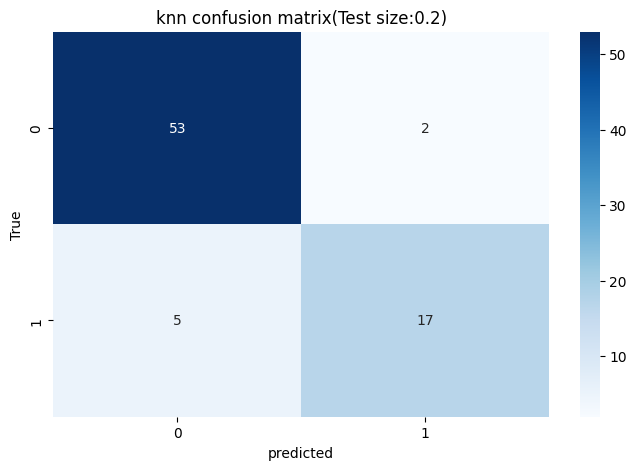


Test size: 0.3
  Accuracy of knn for simulation1 : 95.65%
  Accuracy of knn for simulation2 : 95.65%
  Accuracy of knn for simulation3 : 95.65%
  Accuracy of knn for simulation4 : 95.65%
  Accuracy of knn for simulation5 : 95.65%
  Accuracy of knn for simulation6 : 95.65%
  Accuracy of knn for simulation7 : 95.65%
  Accuracy of knn for simulation8 : 95.65%
  Accuracy of knn for simulation9 : 95.65%
  Accuracy of knn for simulation10 : 95.65%
  Accuracy of knn for simulation11 : 95.65%
  Accuracy of knn for simulation12 : 95.65%
  Accuracy of knn for simulation13 : 95.65%
  Accuracy of knn for simulation14 : 95.65%
  Accuracy of knn for simulation15 : 95.65%
  Accuracy of knn for simulation16 : 95.65%
  Accuracy of knn for simulation17 : 95.65%
  Accuracy of knn for simulation18 : 95.65%
  Accuracy of knn for simulation19 : 95.65%
  Accuracy of knn for simulation20 : 95.65%
  Accuracy of knn for simulation21 : 95.65%

Mean Accuracy: 95.65%
Variance of Accuracy: 0.00
Standard Deviation 

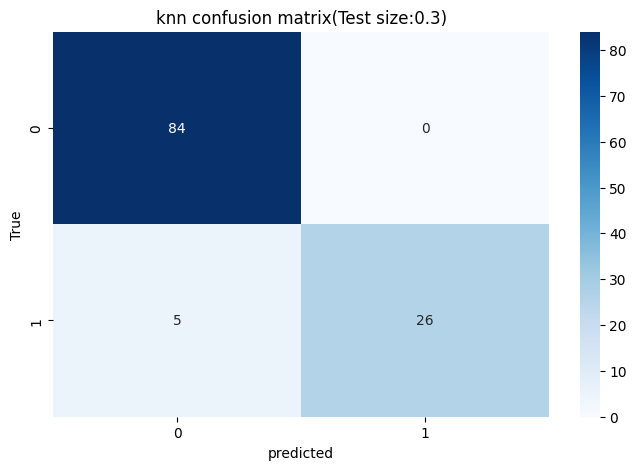

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
test_sizes = [0.1, 0.2, 0.3]
random_state_value = 66

for test_size in test_sizes:
    accuracies=[]
    print(f"\nTest size: {test_size}")

    for i in range(21):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state_value)

        # Standardize the features
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        # K-nearest neighbors
        knn_model = KNeighborsClassifier(n_neighbors=3)
        knn_model.fit(x_train_scaled, y_train)

        # Predict using the trained model
        predicted_knn = knn_model.predict(x_test_scaled)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted_knn) * 100
        accuracies.append(accuracy)
        print(f'  Accuracy of knn for simulation{i+1} : {accuracy:.2f}%')

        #calculate confusion matrix
        knn_cm=confusion_matrix(y_test,predicted_knn)

        #classification report of knn
        knn_cr=classification_report(y_test,predicted_knn)

    #Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
    print(f"Confusion Matrix:")
    print(knn_cm)
    print(f"Classification Report:")
    print(knn_cr)

    #plot confusion matrix of knn
    import seaborn as sns

    plt.figure(figsize=(8,5))
    sns.heatmap(knn_cm,annot=True,fmt='d',cmap='Blues',xticklabels=True, yticklabels=True)
    plt.title(f'knn confusion matrix(Test size:{test_size})')
    plt.xlabel('predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
#plot confusion matrix of knn
import seaborn as sns

plt.figure(figsize=(12,5))
sns.heatmap(knn_cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Class 1','Class 2'], yticklabels=['Class 1','Class 2'])
plt.title(f'knn confusion matrix(Test size:{test_size})')
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#parameter tunning of knn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=66)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#define parameter grid
k_values=[3,5,7]
best_k=None
best_score=0

for k in k_values:
  knn_model=KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train_scaled,y_train)
  val_pred=knn_model.predict(x_test_scaled)
  score=accuracy_score(y_test,val_pred)
  print(score)
  if score>best_score:
    best_k=k
    best_score=score

print(f"Best_k:{best_k}")
print(f'best accuracy:{best_score}')

0.9565217391304348
0.9478260869565217
0.9478260869565217
Best_k:3
best accuracy:0.9565217391304348


In [ ]:
#knn hyperparameter tuning
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
#import numpy as np


    # Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=66)

# standardscaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
    # Define the knn model
knn_model = KNeighborsClassifier()

    # Define the hyperparameter grid to search
param_grid = {
        'n_neighbors': [3,5,6,7,9]
    }

    # Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

dt=pd.DataFrame(grid_search.cv_results_)

    # Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_accuracy=grid_search.best_score_
    #print("best_accuracy:", best_accuracy)
print(f'best_accuracy: {best_accuracy*100:.2f}%')




Best Parameters: {'n_neighbors': 7}
best_accuracy: 92.14%


In [ ]:
#update knn for n_neighbors=7

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
test_sizes = [0.1, 0.2, 0.3]
random_state_value = 66

for test_size in test_sizes:
    accuracies=[]
    print(f"\nTest size: {test_size}")

    for i in range(21):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state_value)

        # Standardize the features
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        # K-nearest neighbors
        knn_model = KNeighborsClassifier(n_neighbors=7)
        knn_model.fit(x_train_scaled, y_train)

        # Predict using the trained model
        predicted_knn = knn_model.predict(x_test_scaled)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted_knn) * 100
        accuracies.append(accuracy)
        print(f'  Accuracy of knn for simulation{i+1} : {accuracy:.2f}%')

        #calculate confusion matrix
        knn_cm=confusion_matrix(y_test,predicted_knn)

        #classification report of knn
        knn_cr=classification_report(y_test,predicted_knn)

    #Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
    print(f"Confusion Matrix:")
    print(knn_cm)
    print(f"Classification Report:")
    print(knn_cr)

    #plot confusion matrix of knn
    #import seaborn as sns

   # plt.figure(figsize=(8,5))
   # sns.heatmap(knn_cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Class 1','Class 2'], yticklabels=['Class 1','Class 2'])
   # plt.title(f'knn confusion matrix(Test size:{test_size})')
   # plt.xlabel('predicted')
   # plt.ylabel('True')
   # plt.show()


Test size: 0.1
  Accuracy of knn for simulation1 : 94.87%
  Accuracy of knn for simulation2 : 94.87%
  Accuracy of knn for simulation3 : 94.87%
  Accuracy of knn for simulation4 : 94.87%
  Accuracy of knn for simulation5 : 94.87%
  Accuracy of knn for simulation6 : 94.87%
  Accuracy of knn for simulation7 : 94.87%
  Accuracy of knn for simulation8 : 94.87%
  Accuracy of knn for simulation9 : 94.87%
  Accuracy of knn for simulation10 : 94.87%
  Accuracy of knn for simulation11 : 94.87%
  Accuracy of knn for simulation12 : 94.87%
  Accuracy of knn for simulation13 : 94.87%
  Accuracy of knn for simulation14 : 94.87%
  Accuracy of knn for simulation15 : 94.87%
  Accuracy of knn for simulation16 : 94.87%
  Accuracy of knn for simulation17 : 94.87%
  Accuracy of knn for simulation18 : 94.87%
  Accuracy of knn for simulation19 : 94.87%
  Accuracy of knn for simulation20 : 94.87%
  Accuracy of knn for simulation21 : 94.87%

Mean Accuracy: 94.87%
Variance of Accuracy: 0.00
Standard Deviation 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
test_sizes = [0.1, 0.2, 0.3]
for test_size in test_sizes:
    print(f"\nTest size: {test_size}")
    accuracies = []  # Store accuracy scores for each iteration

    for i in range(20):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size,random_state=66)

         # Standardize the features
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        # SVM
        svm_model = SVC(kernel='linear')
        svm_model.fit(x_train_scaled, y_train)

        # Predict using the trained model
        predicted = svm_model.predict(x_test_scaled)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted) * 100
        accuracies.append(accuracy)

        print(f'  Accuracy of svm for simulation{i+1}: {accuracy:.2f}%')
        #calculate confusion matrix
        svm_cm=confusion_matrix(y_test,predicted)

    # Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
    print(f"Confusion Matrix:")
    print(svm_cm)


Test size: 0.1
  Accuracy of svm for simulation1: 92.31%
  Accuracy of svm for simulation2: 92.31%
  Accuracy of svm for simulation3: 92.31%
  Accuracy of svm for simulation4: 92.31%
  Accuracy of svm for simulation5: 92.31%
  Accuracy of svm for simulation6: 92.31%
  Accuracy of svm for simulation7: 92.31%
  Accuracy of svm for simulation8: 92.31%
  Accuracy of svm for simulation9: 92.31%
  Accuracy of svm for simulation10: 92.31%
  Accuracy of svm for simulation11: 92.31%
  Accuracy of svm for simulation12: 92.31%
  Accuracy of svm for simulation13: 92.31%
  Accuracy of svm for simulation14: 92.31%
  Accuracy of svm for simulation15: 92.31%
  Accuracy of svm for simulation16: 92.31%
  Accuracy of svm for simulation17: 92.31%
  Accuracy of svm for simulation18: 92.31%
  Accuracy of svm for simulation19: 92.31%
  Accuracy of svm for simulation20: 92.31%

Mean Accuracy: 92.31%
Variance of Accuracy: 0.00
Standard Deviation of Accuracy: 0.00

Confusion Matrix:
[[24  2]
 [ 1 12]]

Test si


Test size: 0.1
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%

Mean Accuracy: 100.00%
Variance of Accuracy: 0.00
Standard Deviation of Accuracy: 0.00

Confusion Matrix:
[[26  0]
 [ 0 13]]
Classification Rep

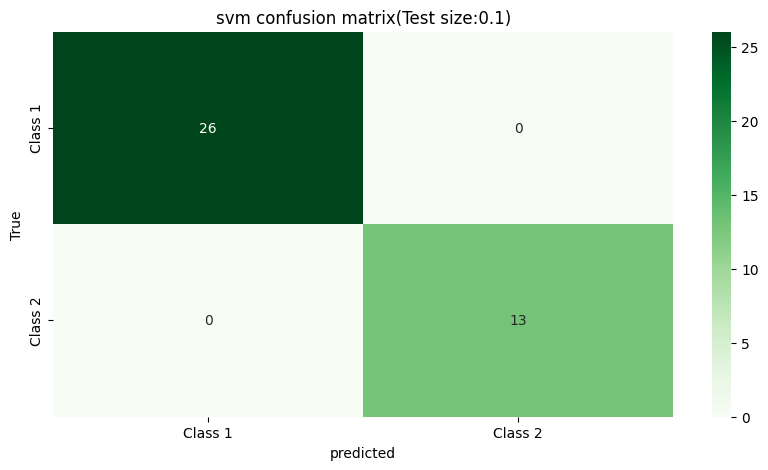


Test size: 0.2
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%
  Accuracy of svm for simulation: 100.00%

Mean Accuracy: 100.00%
Variance of Accuracy: 0.00
Standard Deviation of Accuracy: 0.00

Confusion Matrix:
[[55  0]
 [ 0 22]]
Classification Rep

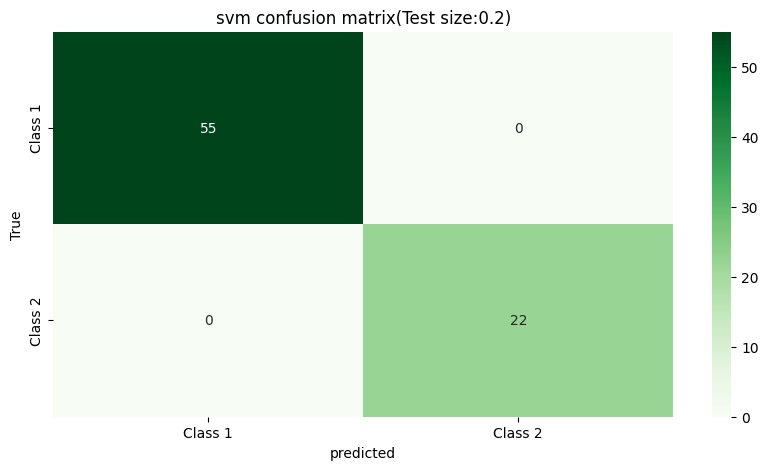


Test size: 0.3
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%
  Accuracy of svm for simulation: 99.13%

Mean Accuracy: 99.13%
Variance of Accuracy: 0.00
Standard Deviation of Accuracy: 0.00

Confusion Matrix:
[[84  0]
 [ 1 30]]
Classification Report:
              pr

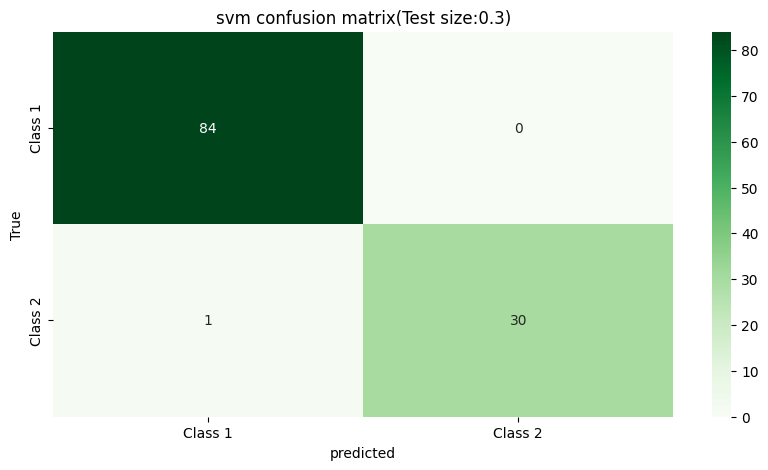

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
test_sizes = [0.1, 0.2, 0.3]
for test_size in test_sizes:
    print(f"\nTest size: {test_size}")
    accuracies = []  # to Store accuracies

    for i in range(20):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size,random_state=66)

        # Standardize the features
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        # SVM
        svm_model = SVC(kernel='rbf',C=1)
        svm_model.fit(x_train_scaled, y_train)

        # Predict using the trained model
        predicted = svm_model.predict(x_test_scaled)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted) * 100
        accuracies.append(accuracy)

        print(f'  Accuracy of svm for simulation: {accuracy:.2f}%')
        #calculate confusion matrix
        svm_cm=confusion_matrix(y_test,predicted)
        #calculate classification report
        svm_cr=classification_report(y_test,predicted)

    # Calculate and print mean, variance, and standard deviation
        mean_accuracy = np.mean(accuracies)
        variance_accuracy = np.var(accuracies)
        std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
    print(f"Confusion Matrix:")
    print(svm_cm)
    print(f"Classification Report:")
    print(svm_cr)

    import seaborn as sns

    plt.figure(figsize=(10,5))
    sns.heatmap(svm_cm,annot=True,fmt='d',cmap='Greens',xticklabels=['Class 1','Class 2'], yticklabels=['Class 1','Class 2'])
    plt.title(f'svm confusion matrix(Test size:{test_size})')
    plt.xlabel('predicted')
    plt.ylabel('True')
    plt.show()


SVM PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
#import numpy as np


    # Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=66)

    #Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

    # Define the SVM model
svm_model = SVC()

    # Define the hyperparameter grid to search
param_grid = {
        'C': [0.1,1,5,10],
        'kernel': ['linear', 'rbf','poly','sigmoid']
    }

    # Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

dt=pd.DataFrame(grid_search.cv_results_)

    # Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_accuracy=grid_search.best_score_
    #print("best_accuracy:", best_accuracy)
print(f'best_accuracy: {best_accuracy*100:.2f}%')




Best Parameters: {'C': 1, 'kernel': 'rbf'}
best_accuracy: 95.63%


In [ ]:
dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004216,0.000405,0.001735,0.000049,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.942029,0.956522,0.985507,0.942029,0.926471,0.950512,0.019913,2
1,0.006147,0.000193,0.003064,0.000135,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.753623,0.797101,0.724638,0.739130,0.779412,0.758781,0.026354,16
2,0.005997,0.001023,0.002169,0.000127,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.797101,0.797101,0.826087,0.753623,0.794118,0.793606,0.023144,15
3,0.006305,0.000177,0.002514,0.000096,0.1,sigmoid,"{'C': 0.1, 'kernel': 'sigmoid'}",0.942029,0.898551,0.956522,0.927536,0.882353,0.921398,0.027362,11
4,0.005074,0.001034,0.001617,0.000148,1,linear,"{'C': 1, 'kernel': 'linear'}",0.913043,0.942029,0.956522,0.927536,0.926471,0.933120,0.014869,6


In [ ]:
dt[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,0.1,linear,0.950512
1,0.1,rbf,0.758781
2,0.1,poly,0.793606
3,0.1,sigmoid,0.921398
4,1,linear,0.933120
5,1,rbf,0.956309
6,1,poly,0.915644
7,1,sigmoid,0.947613
8,10,linear,0.918500
9,10,rbf,0.947613


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:
    print(f"\nTest size: {test_size}")
    accuracies = []  # Store accuracy scores for each iteration

    for i in range(20):  # You can adjust the number of iterations as needed
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=66)



        # Decision Tree
        dt_model = DecisionTreeClassifier()
        dt_model.fit(x_train, y_train)

        # Predict using the trained model
        predicted = dt_model.predict(x_test)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted) * 100
        accuracies.append(accuracy)

        print(f'  Accuracy of Decision Tree for simulation {i + 1}: {accuracy:.2f}%')

        # Calculate confusion matrix
        dt_cm = confusion_matrix(y_test, predicted)

    # Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
    print(dt_cm)



Test size: 0.1
  Accuracy of Decision Tree for simulation 1: 92.31%
  Accuracy of Decision Tree for simulation 2: 89.74%
  Accuracy of Decision Tree for simulation 3: 92.31%
  Accuracy of Decision Tree for simulation 4: 92.31%
  Accuracy of Decision Tree for simulation 5: 92.31%
  Accuracy of Decision Tree for simulation 6: 92.31%
  Accuracy of Decision Tree for simulation 7: 92.31%
  Accuracy of Decision Tree for simulation 8: 87.18%
  Accuracy of Decision Tree for simulation 9: 92.31%
  Accuracy of Decision Tree for simulation 10: 92.31%
  Accuracy of Decision Tree for simulation 11: 89.74%
  Accuracy of Decision Tree for simulation 12: 87.18%
  Accuracy of Decision Tree for simulation 13: 92.31%
  Accuracy of Decision Tree for simulation 14: 89.74%
  Accuracy of Decision Tree for simulation 15: 87.18%
  Accuracy of Decision Tree for simulation 16: 89.74%
  Accuracy of Decision Tree for simulation 17: 89.74%
  Accuracy of Decision Tree for simulation 18: 89.74%
  Accuracy of Decisio

In [ ]:
#Decision Tree hyperparameter Tunning
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming x and y are already defined
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

# standardize the features
#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
     'max_depth': [None,3,5,7,9,10],
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5,scoring='accuracy')
grid_search.fit(x_train, y_train)

# Convert GridSearchCV results to a DataFrame
dt = pd.DataFrame(grid_search.cv_results_)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_max_depth=best_params['max_depth']
print("Best Parameters:", best_params)

best_accuracy = grid_search.best_score_
print(f'Best Cross-Validation Accuracy: {best_accuracy*100:.2f}%')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Best Parameters: {'max_depth': 3}
Best Cross-Validation Accuracy: 94.77%
Test Accuracy: 97.40%


Update Decision Tree with the best parameter


Test size: 0.1
  Accuracy of Decision Tree for simulation 1: 97.44%
  Accuracy of Decision Tree for simulation 2: 94.87%
  Accuracy of Decision Tree for simulation 3: 97.44%
  Accuracy of Decision Tree for simulation 4: 97.44%
  Accuracy of Decision Tree for simulation 5: 94.87%
  Accuracy of Decision Tree for simulation 6: 94.87%
  Accuracy of Decision Tree for simulation 7: 94.87%
  Accuracy of Decision Tree for simulation 8: 94.87%
  Accuracy of Decision Tree for simulation 9: 94.87%
  Accuracy of Decision Tree for simulation 10: 94.87%
  Accuracy of Decision Tree for simulation 11: 97.44%
  Accuracy of Decision Tree for simulation 12: 97.44%
  Accuracy of Decision Tree for simulation 13: 97.44%
  Accuracy of Decision Tree for simulation 14: 94.87%
  Accuracy of Decision Tree for simulation 15: 97.44%
  Accuracy of Decision Tree for simulation 16: 94.87%
  Accuracy of Decision Tree for simulation 17: 97.44%
  Accuracy of Decision Tree for simulation 18: 97.44%
  Accuracy of Decisio

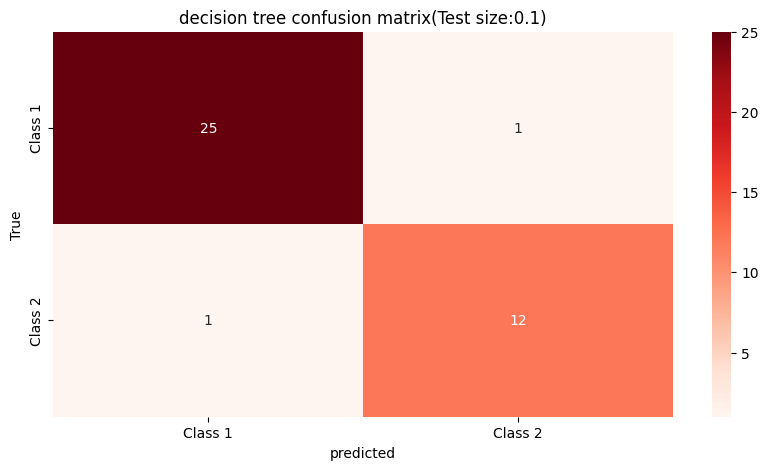


Test size: 0.2
  Accuracy of Decision Tree for simulation 1: 96.10%
  Accuracy of Decision Tree for simulation 2: 96.10%
  Accuracy of Decision Tree for simulation 3: 97.40%
  Accuracy of Decision Tree for simulation 4: 97.40%
  Accuracy of Decision Tree for simulation 5: 96.10%
  Accuracy of Decision Tree for simulation 6: 94.81%
  Accuracy of Decision Tree for simulation 7: 94.81%
  Accuracy of Decision Tree for simulation 8: 96.10%
  Accuracy of Decision Tree for simulation 9: 96.10%
  Accuracy of Decision Tree for simulation 10: 97.40%
  Accuracy of Decision Tree for simulation 11: 96.10%
  Accuracy of Decision Tree for simulation 12: 96.10%
  Accuracy of Decision Tree for simulation 13: 96.10%
  Accuracy of Decision Tree for simulation 14: 97.40%
  Accuracy of Decision Tree for simulation 15: 96.10%
  Accuracy of Decision Tree for simulation 16: 97.40%
  Accuracy of Decision Tree for simulation 17: 94.81%
  Accuracy of Decision Tree for simulation 18: 94.81%
  Accuracy of Decisio

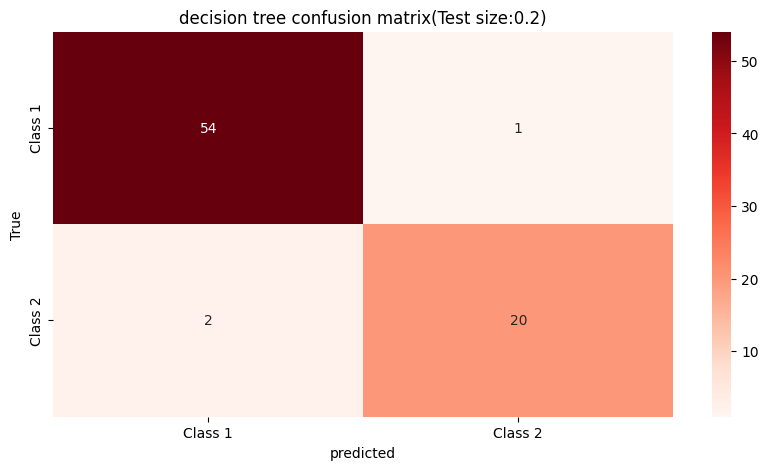


Test size: 0.3
  Accuracy of Decision Tree for simulation 1: 96.52%
  Accuracy of Decision Tree for simulation 2: 96.52%
  Accuracy of Decision Tree for simulation 3: 97.39%
  Accuracy of Decision Tree for simulation 4: 96.52%
  Accuracy of Decision Tree for simulation 5: 96.52%
  Accuracy of Decision Tree for simulation 6: 97.39%
  Accuracy of Decision Tree for simulation 7: 96.52%
  Accuracy of Decision Tree for simulation 8: 96.52%
  Accuracy of Decision Tree for simulation 9: 97.39%
  Accuracy of Decision Tree for simulation 10: 97.39%
  Accuracy of Decision Tree for simulation 11: 97.39%
  Accuracy of Decision Tree for simulation 12: 97.39%
  Accuracy of Decision Tree for simulation 13: 96.52%
  Accuracy of Decision Tree for simulation 14: 96.52%
  Accuracy of Decision Tree for simulation 15: 96.52%
  Accuracy of Decision Tree for simulation 16: 97.39%
  Accuracy of Decision Tree for simulation 17: 97.39%
  Accuracy of Decision Tree for simulation 18: 97.39%
  Accuracy of Decisio

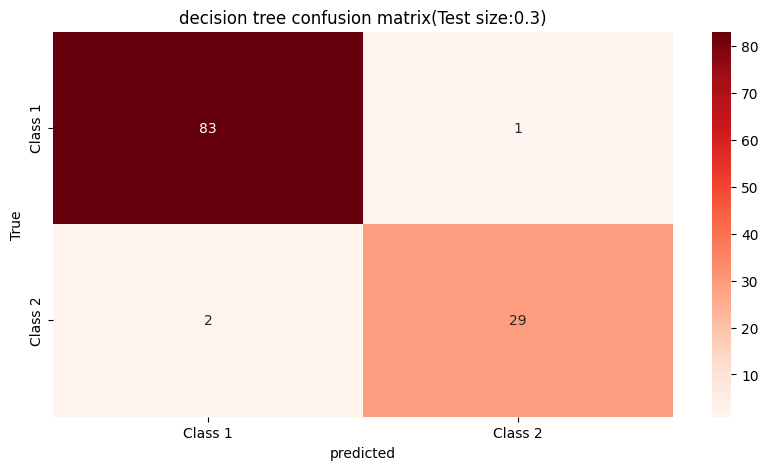

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:
    print(f"\nTest size: {test_size}")
    accuracies = []  # Store accuracy scores for each iteration

    for i in range(20):  # You can adjust the number of iterations as needed
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=66)



        # Decision Tree
        dt_model = DecisionTreeClassifier(max_depth=3)
        dt_model.fit(x_train, y_train)

        # Predict using the trained model
        predicted = dt_model.predict(x_test)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted) * 100
        accuracies.append(accuracy)

        print(f'  Accuracy of Decision Tree for simulation {i + 1}: {accuracy:.2f}%')

        # Calculate confusion matrix
        if i==19:
          dt_cm = confusion_matrix(y_test, predicted)
        #calculate classification report
        dt_cr=classification_report(y_test,predicted)

    # Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
    print(dt_cm)
    print(f"Classification Report:")
    print(dt_cr)

    #plot confusion matrix of DT
    import seaborn as sns

    plt.figure(figsize=(10,5))
    sns.heatmap(dt_cm,annot=True,fmt='d',cmap='Reds',xticklabels=['Class 1','Class 2'], yticklabels=['Class 1','Class 2'])
    plt.title(f'decision tree confusion matrix(Test size:{test_size})')
    plt.xlabel('predicted')
    plt.ylabel('True')
    plt.show()




Test size: 0.1
  Accuracy of Decision Tree for simulation 1: 94.87%
  Accuracy of Decision Tree for simulation 2: 97.44%
  Accuracy of Decision Tree for simulation 3: 94.87%
  Accuracy of Decision Tree for simulation 4: 94.87%
  Accuracy of Decision Tree for simulation 5: 97.44%
  Accuracy of Decision Tree for simulation 6: 97.44%
  Accuracy of Decision Tree for simulation 7: 97.44%
  Accuracy of Decision Tree for simulation 8: 94.87%
  Accuracy of Decision Tree for simulation 9: 94.87%
  Accuracy of Decision Tree for simulation 10: 97.44%
  Accuracy of Decision Tree for simulation 11: 97.44%
  Accuracy of Decision Tree for simulation 12: 94.87%
  Accuracy of Decision Tree for simulation 13: 97.44%
  Accuracy of Decision Tree for simulation 14: 94.87%
  Accuracy of Decision Tree for simulation 15: 97.44%
  Accuracy of Decision Tree for simulation 16: 97.44%
  Accuracy of Decision Tree for simulation 17: 94.87%
  Accuracy of Decision Tree for simulation 18: 94.87%
  Accuracy of Decisio

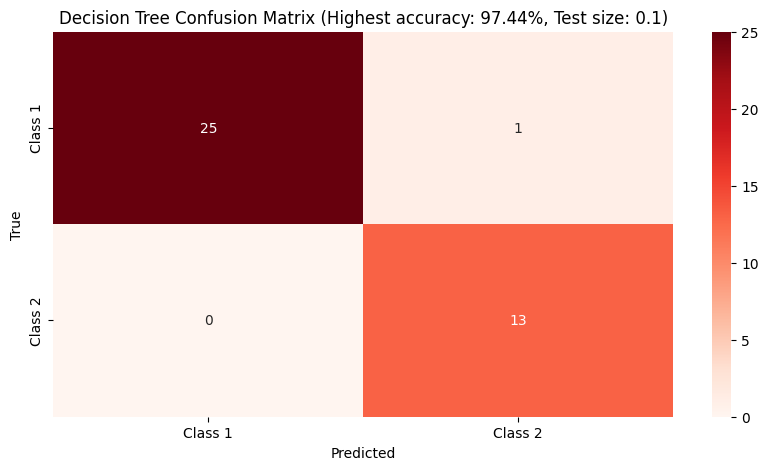


Test size: 0.2
  Accuracy of Decision Tree for simulation 1: 97.40%
  Accuracy of Decision Tree for simulation 2: 97.40%
  Accuracy of Decision Tree for simulation 3: 97.40%
  Accuracy of Decision Tree for simulation 4: 96.10%
  Accuracy of Decision Tree for simulation 5: 97.40%
  Accuracy of Decision Tree for simulation 6: 97.40%
  Accuracy of Decision Tree for simulation 7: 96.10%
  Accuracy of Decision Tree for simulation 8: 94.81%
  Accuracy of Decision Tree for simulation 9: 96.10%
  Accuracy of Decision Tree for simulation 10: 96.10%
  Accuracy of Decision Tree for simulation 11: 97.40%
  Accuracy of Decision Tree for simulation 12: 97.40%
  Accuracy of Decision Tree for simulation 13: 97.40%
  Accuracy of Decision Tree for simulation 14: 94.81%
  Accuracy of Decision Tree for simulation 15: 96.10%
  Accuracy of Decision Tree for simulation 16: 94.81%
  Accuracy of Decision Tree for simulation 17: 97.40%
  Accuracy of Decision Tree for simulation 18: 96.10%
  Accuracy of Decisio

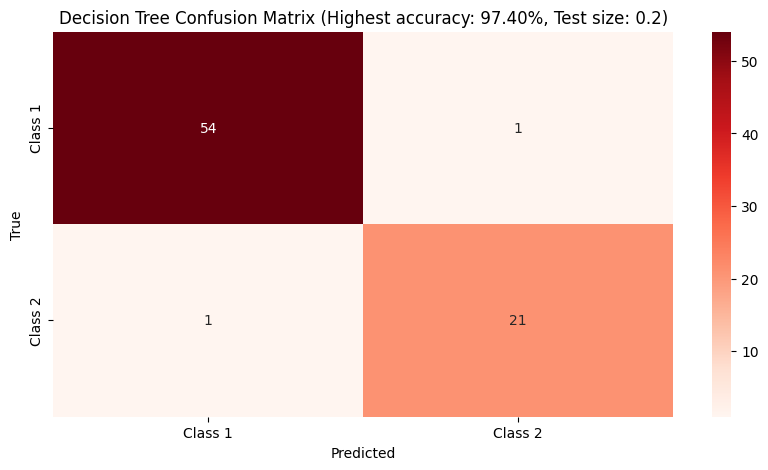


Test size: 0.3
  Accuracy of Decision Tree for simulation 1: 97.39%
  Accuracy of Decision Tree for simulation 2: 97.39%
  Accuracy of Decision Tree for simulation 3: 97.39%
  Accuracy of Decision Tree for simulation 4: 97.39%
  Accuracy of Decision Tree for simulation 5: 97.39%
  Accuracy of Decision Tree for simulation 6: 97.39%
  Accuracy of Decision Tree for simulation 7: 96.52%
  Accuracy of Decision Tree for simulation 8: 96.52%
  Accuracy of Decision Tree for simulation 9: 97.39%
  Accuracy of Decision Tree for simulation 10: 97.39%
  Accuracy of Decision Tree for simulation 11: 96.52%
  Accuracy of Decision Tree for simulation 12: 97.39%
  Accuracy of Decision Tree for simulation 13: 97.39%
  Accuracy of Decision Tree for simulation 14: 97.39%
  Accuracy of Decision Tree for simulation 15: 96.52%
  Accuracy of Decision Tree for simulation 16: 97.39%
  Accuracy of Decision Tree for simulation 17: 97.39%
  Accuracy of Decision Tree for simulation 18: 96.52%
  Accuracy of Decisio

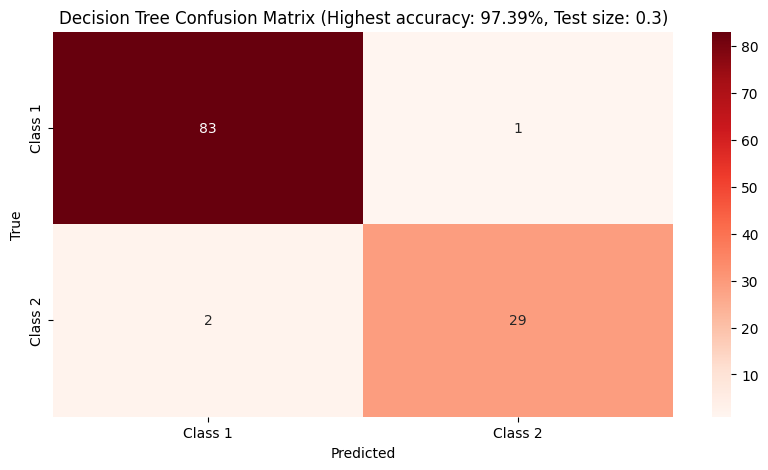

In [ ]:
# confusion matrix for highest accuracy

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming `x` and `y` are your features and labels
test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:
    print(f"\nTest size: {test_size}")
    accuracies = []  # Store accuracy scores for each iteration
    highest_accuracy = 0
    best_cm = None

    for i in range(20):  # You can adjust the number of iterations as needed
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=66)

        # Decision Tree
        dt_model = DecisionTreeClassifier(max_depth=3)
        dt_model.fit(x_train, y_train)

        # Predict using the trained model
        predicted = dt_model.predict(x_test)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted) * 100
        accuracies.append(accuracy)

        print(f'  Accuracy of Decision Tree for simulation {i + 1}: {accuracy:.2f}%')
        #calculate classification report
        dt_cr=classification_report(y_test,predicted)

        # Update best confusion matrix and classification report
        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            best_cm = confusion_matrix(y_test, predicted)

    # Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')

    print(f"Confusion Matrix for the highest accuracy ({highest_accuracy:.2f}%):")
    print(best_cm)
    print("Classification matrix:")
    print(dt_cr)
    #print(best_cr)

    # Plot the confusion matrix with the highest accuracy
    plt.figure(figsize=(10, 5))
    sns.heatmap(best_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
    plt.title(f'Decision Tree Confusion Matrix (Highest accuracy: {highest_accuracy:.2f}%, Test size: {test_size})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Updated Decision Tree with different random state
corrected code of dt


Test size: 0.1
  Accuracy of Decision Tree for simulation 1: 94.87%
  Accuracy of Decision Tree for simulation 2: 97.44%
  Accuracy of Decision Tree for simulation 3: 92.31%
  Accuracy of Decision Tree for simulation 4: 94.87%
  Accuracy of Decision Tree for simulation 5: 97.44%
  Accuracy of Decision Tree for simulation 6: 92.31%
  Accuracy of Decision Tree for simulation 7: 97.44%
  Accuracy of Decision Tree for simulation 8: 97.44%
  Accuracy of Decision Tree for simulation 9: 92.31%
  Accuracy of Decision Tree for simulation 10: 100.00%
  Accuracy of Decision Tree for simulation 11: 97.44%
  Accuracy of Decision Tree for simulation 12: 89.74%
  Accuracy of Decision Tree for simulation 13: 92.31%
  Accuracy of Decision Tree for simulation 14: 100.00%
  Accuracy of Decision Tree for simulation 15: 92.31%
  Accuracy of Decision Tree for simulation 16: 94.87%
  Accuracy of Decision Tree for simulation 17: 94.87%
  Accuracy of Decision Tree for simulation 18: 89.74%
  Accuracy of Decis

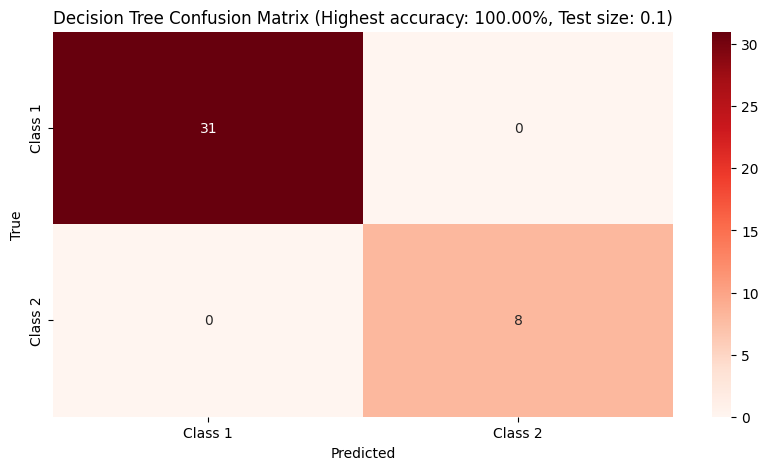


Test size: 0.2
  Accuracy of Decision Tree for simulation 1: 98.70%
  Accuracy of Decision Tree for simulation 2: 94.81%
  Accuracy of Decision Tree for simulation 3: 93.51%
  Accuracy of Decision Tree for simulation 4: 96.10%
  Accuracy of Decision Tree for simulation 5: 98.70%
  Accuracy of Decision Tree for simulation 6: 96.10%
  Accuracy of Decision Tree for simulation 7: 94.81%
  Accuracy of Decision Tree for simulation 8: 97.40%
  Accuracy of Decision Tree for simulation 9: 94.81%
  Accuracy of Decision Tree for simulation 10: 94.81%
  Accuracy of Decision Tree for simulation 11: 93.51%
  Accuracy of Decision Tree for simulation 12: 93.51%
  Accuracy of Decision Tree for simulation 13: 96.10%
  Accuracy of Decision Tree for simulation 14: 94.81%
  Accuracy of Decision Tree for simulation 15: 94.81%
  Accuracy of Decision Tree for simulation 16: 93.51%
  Accuracy of Decision Tree for simulation 17: 96.10%
  Accuracy of Decision Tree for simulation 18: 94.81%
  Accuracy of Decisio

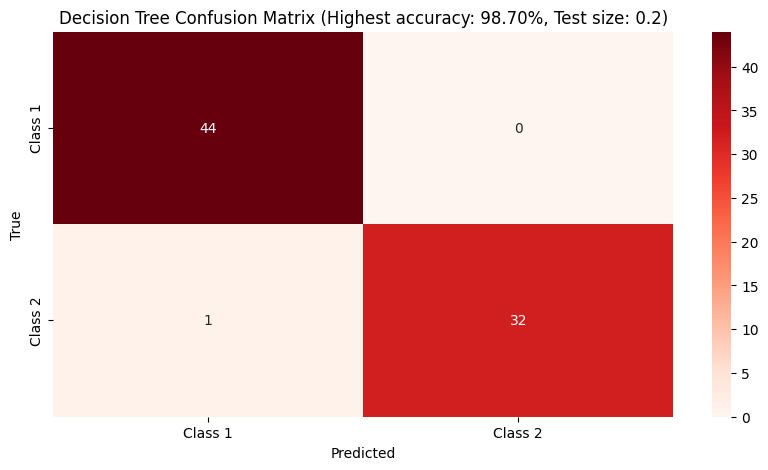


Test size: 0.3
  Accuracy of Decision Tree for simulation 1: 94.78%
  Accuracy of Decision Tree for simulation 2: 95.65%
  Accuracy of Decision Tree for simulation 3: 96.52%
  Accuracy of Decision Tree for simulation 4: 93.04%
  Accuracy of Decision Tree for simulation 5: 89.57%
  Accuracy of Decision Tree for simulation 6: 93.91%
  Accuracy of Decision Tree for simulation 7: 96.52%
  Accuracy of Decision Tree for simulation 8: 94.78%
  Accuracy of Decision Tree for simulation 9: 93.04%
  Accuracy of Decision Tree for simulation 10: 94.78%
  Accuracy of Decision Tree for simulation 11: 95.65%
  Accuracy of Decision Tree for simulation 12: 93.91%
  Accuracy of Decision Tree for simulation 13: 93.04%
  Accuracy of Decision Tree for simulation 14: 93.04%
  Accuracy of Decision Tree for simulation 15: 93.91%
  Accuracy of Decision Tree for simulation 16: 94.78%
  Accuracy of Decision Tree for simulation 17: 92.17%
  Accuracy of Decision Tree for simulation 18: 94.78%
  Accuracy of Decisio

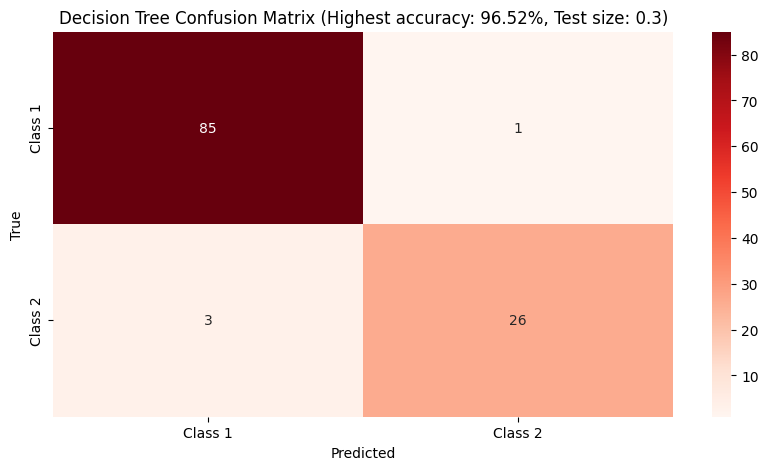

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:
    dt_best_cm=None
    highest_accuracy = 0
    print(f"\nTest size: {test_size}")
    accuracies = []  # Store accuracy scores for each iteration

    for i in range(20):
        random_s=np.random.randint(0,100)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_s)



        # Decision Tree
        dt_model = DecisionTreeClassifier(max_depth=3)
        dt_model.fit(x_train, y_train)

        # Predict using the trained model
        predicted = dt_model.predict(x_test)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted) * 100
        accuracies.append(accuracy)

        print(f'  Accuracy of Decision Tree for simulation {i + 1}: {accuracy:.2f}%')

        # Update best confusion matrix and classification report
        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            dt_best_cm = confusion_matrix(y_test, predicted)

        #calculate classification report
        dt_cr=classification_report(y_test,predicted)

    # Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')

    print(f"Confusion Matrix for the highest accuracy ({highest_accuracy:.2f}%):")
    print(dt_best_cm)
    print(f"Classification Report:")
    print(dt_cr)

    #plot confusion matrix of DT
    plt.figure(figsize=(10, 5))
    sns.heatmap(dt_best_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
    plt.title(f'Decision Tree Confusion Matrix (Highest accuracy: {highest_accuracy:.2f}%, Test size: {test_size})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

# standardize Using min_max scalar
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("x_train_scaled :")
print(x_train_scaled)


x_train_scaled :
[[0.6119403  0.         0.         ... 0.         0.         1.        ]
 [0.52238806 0.         0.         ... 0.         1.         0.        ]
 [0.55223881 1.         0.         ... 1.         0.         0.        ]
 ...
 [0.19402985 0.         0.         ... 1.         0.         0.        ]
 [0.32835821 0.         0.         ... 0.         0.         1.        ]
 [0.3880597  0.         0.         ... 1.         0.         0.        ]]


In [ ]:
print("x_test:")
print(x_test_scaled)

x_test:
[[0.13432836 0.         0.         ... 0.         0.         0.        ]
 [0.8358209  1.         0.         ... 0.         0.         1.        ]
 [0.37313433 0.         0.         ... 0.         0.         1.        ]
 ...
 [0.34328358 0.         0.         ... 1.         0.         0.        ]
 [0.14925373 0.         0.         ... 1.         0.         0.        ]
 [0.53731343 0.         0.         ... 1.         0.         0.        ]]


SVM parameter tunning using MinMaxScalar

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
#import numpy as np


    # Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

# MinMaxScalar
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
    # Define the SVM model
svm_model = SVC()

    # Define the hyperparameter grid to search
param_grid = {
        'C': [0.1,1,5,10],
        'kernel': ['linear', 'rbf','poly','sigmoid']
    }

    # Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

dt=pd.DataFrame(grid_search.cv_results_)

    # Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_accuracy=grid_search.best_score_
    #print("best_accuracy:", best_accuracy)
print(f'best_accuracy: {best_accuracy*100:.2f}%')




Best Parameters: {'C': 1, 'kernel': 'linear'}
best_accuracy: 95.34%


Best Parameters: {'C': 1, 'kernel': 'linear'}
best_accuracy: 95.34%
for test_size=0.1


for test_size=0.2

Best Parameters: {'C': 1, 'kernel': 'sigmoid'}
best_accuracy: 94.39% for test_size=0.3


Test size: 0.1
  Accuracy of SVM for simulation 1: 89.74%
  Accuracy of SVM for simulation 2: 97.44%
  Accuracy of SVM for simulation 3: 97.44%
  Accuracy of SVM for simulation 4: 94.87%
  Accuracy of SVM for simulation 5: 97.44%
  Accuracy of SVM for simulation 6: 97.44%
  Accuracy of SVM for simulation 7: 87.18%
  Accuracy of SVM for simulation 8: 94.87%
  Accuracy of SVM for simulation 9: 100.00%
  Accuracy of SVM for simulation 10: 92.31%
  Accuracy of SVM for simulation 11: 94.87%
  Accuracy of SVM for simulation 12: 97.44%
  Accuracy of SVM for simulation 13: 94.87%
  Accuracy of SVM for simulation 14: 100.00%
  Accuracy of SVM for simulation 15: 100.00%
  Accuracy of SVM for simulation 16: 100.00%
  Accuracy of SVM for simulation 17: 94.87%
  Accuracy of SVM for simulation 18: 97.44%
  Accuracy of SVM for simulation 19: 92.31%
  Accuracy of SVM for simulation 20: 87.18%

Mean Accuracy: 95.38%
Variance of Accuracy: 14.86
Standard Deviation of Accuracy: 3.85

Confusion Matrix for

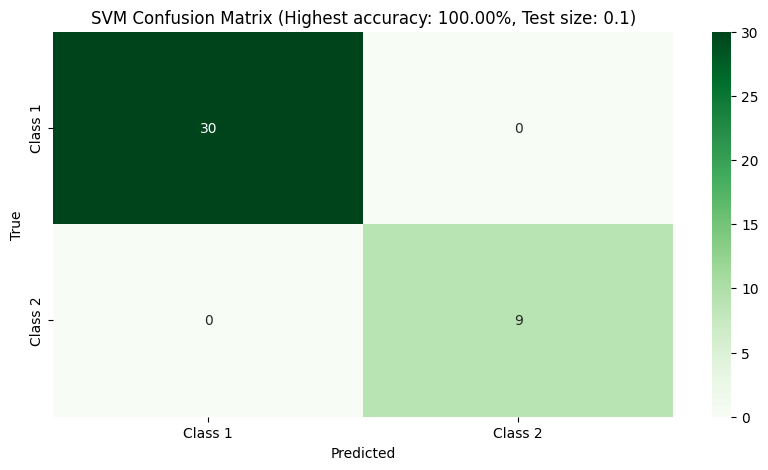


Test size: 0.2
  Accuracy of SVM for simulation 1: 97.40%
  Accuracy of SVM for simulation 2: 93.51%
  Accuracy of SVM for simulation 3: 93.51%
  Accuracy of SVM for simulation 4: 94.81%
  Accuracy of SVM for simulation 5: 94.81%
  Accuracy of SVM for simulation 6: 96.10%
  Accuracy of SVM for simulation 7: 94.81%
  Accuracy of SVM for simulation 8: 97.40%
  Accuracy of SVM for simulation 9: 96.10%
  Accuracy of SVM for simulation 10: 96.10%
  Accuracy of SVM for simulation 11: 96.10%
  Accuracy of SVM for simulation 12: 93.51%
  Accuracy of SVM for simulation 13: 93.51%
  Accuracy of SVM for simulation 14: 96.10%
  Accuracy of SVM for simulation 15: 94.81%
  Accuracy of SVM for simulation 16: 96.10%
  Accuracy of SVM for simulation 17: 93.51%
  Accuracy of SVM for simulation 18: 92.21%
  Accuracy of SVM for simulation 19: 96.10%
  Accuracy of SVM for simulation 20: 94.81%

Mean Accuracy: 95.06%
Variance of Accuracy: 1.96
Standard Deviation of Accuracy: 1.40

Confusion Matrix for the 

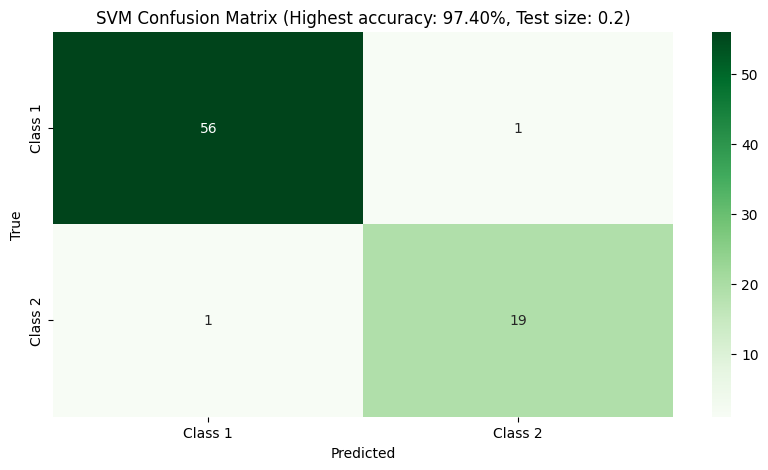


Test size: 0.3
  Accuracy of SVM for simulation 1: 95.65%
  Accuracy of SVM for simulation 2: 93.04%
  Accuracy of SVM for simulation 3: 93.04%
  Accuracy of SVM for simulation 4: 93.04%
  Accuracy of SVM for simulation 5: 92.17%
  Accuracy of SVM for simulation 6: 93.91%
  Accuracy of SVM for simulation 7: 96.52%
  Accuracy of SVM for simulation 8: 95.65%
  Accuracy of SVM for simulation 9: 95.65%
  Accuracy of SVM for simulation 10: 93.04%
  Accuracy of SVM for simulation 11: 93.04%
  Accuracy of SVM for simulation 12: 95.65%
  Accuracy of SVM for simulation 13: 93.91%
  Accuracy of SVM for simulation 14: 93.04%
  Accuracy of SVM for simulation 15: 95.65%
  Accuracy of SVM for simulation 16: 95.65%
  Accuracy of SVM for simulation 17: 96.52%
  Accuracy of SVM for simulation 18: 96.52%
  Accuracy of SVM for simulation 19: 93.04%
  Accuracy of SVM for simulation 20: 98.26%

Mean Accuracy: 94.65%
Variance of Accuracy: 2.74
Standard Deviation of Accuracy: 1.66

Confusion Matrix for the 

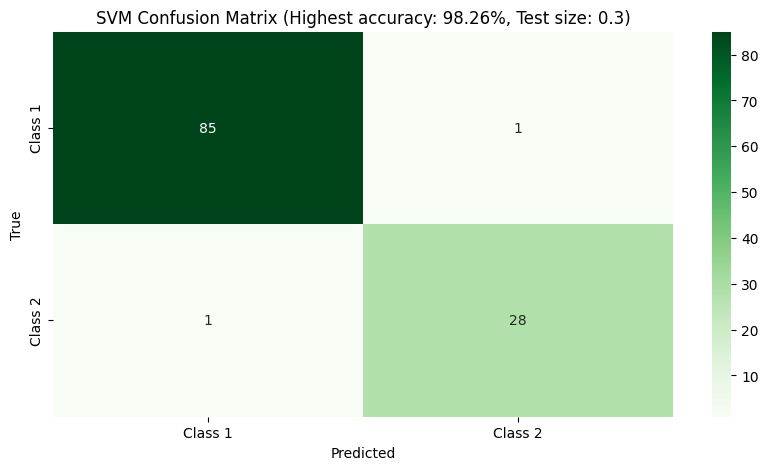

In [ ]:
#update svm using MinMaxScalar

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler

test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:
    print(f"\nTest size: {test_size}")
    accuracies = []  # to Store accuracies
    highest_accuracy = 0  # Initialize the highest accuracy
    best_svm_cm = None  # Initialize the best confusion matrix

    for i in range(20):
        # Generate a random state
        random_s = np.random.randint(0, 100)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_s)

        # Using MinMaxScaler
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        # SVM
        svm_model = SVC(kernel='linear', C=1)
        svm_model.fit(x_train_scaled, y_train)

        # Predict using the trained model
        predicted = svm_model.predict(x_test_scaled)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted) * 100
        accuracies.append(accuracy)

        print(f'  Accuracy of SVM for simulation {i + 1}: {accuracy:.2f}%')

        # Update best confusion matrix and classification report
        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            best_svm_cm = confusion_matrix(y_test, predicted)

        # calculate classification report
        svm_cr = classification_report(y_test, predicted)

    # Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')

    print(f"Confusion Matrix for the highest accuracy ({highest_accuracy:.2f}%):")
    print(best_svm_cm)
    print(f"Classification Report:")
    print(svm_cr)

    # Plot the confusion matrix with the highest accuracy
    plt.figure(figsize=(10, 5))
    sns.heatmap(best_svm_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
    plt.title(f'SVM Confusion Matrix (Highest accuracy: {highest_accuracy:.2f}%, Test size: {test_size})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [ ]:
#knn hyperparameter tuning (MinMaxscaler)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler


    # Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=66)

# MinMaxScalar
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
    # Define the knn model
knn_model = KNeighborsClassifier()

    # Define the hyperparameter grid to search
param_grid = {
        'n_neighbors': [3,5,6,7,9]
    }

    # Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

dt=pd.DataFrame(grid_search.cv_results_)

    # Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_accuracy=grid_search.best_score_
    #print("best_accuracy:", best_accuracy)
print(f'best_accuracy: {best_accuracy*100:.2f}%')




Best Parameters: {'n_neighbors': 7}
best_accuracy: 93.60%



Test size: 0.1
  Accuracy of knn for simulation1 : 92.31%
  Accuracy of knn for simulation2 : 84.62%
  Accuracy of knn for simulation3 : 82.05%
  Accuracy of knn for simulation4 : 89.74%
  Accuracy of knn for simulation5 : 97.44%
  Accuracy of knn for simulation6 : 89.74%
  Accuracy of knn for simulation7 : 92.31%
  Accuracy of knn for simulation8 : 92.31%
  Accuracy of knn for simulation9 : 94.87%
  Accuracy of knn for simulation10 : 92.31%
  Accuracy of knn for simulation11 : 92.31%
  Accuracy of knn for simulation12 : 89.74%
  Accuracy of knn for simulation13 : 87.18%
  Accuracy of knn for simulation14 : 89.74%
  Accuracy of knn for simulation15 : 89.74%
  Accuracy of knn for simulation16 : 92.31%
  Accuracy of knn for simulation17 : 94.87%
  Accuracy of knn for simulation18 : 100.00%
  Accuracy of knn for simulation19 : 94.87%
  Accuracy of knn for simulation20 : 94.87%
  Accuracy of knn for simulation21 : 97.44%

Mean Accuracy: 91.94%
Variance of Accuracy: 17.09
Standard Deviatio

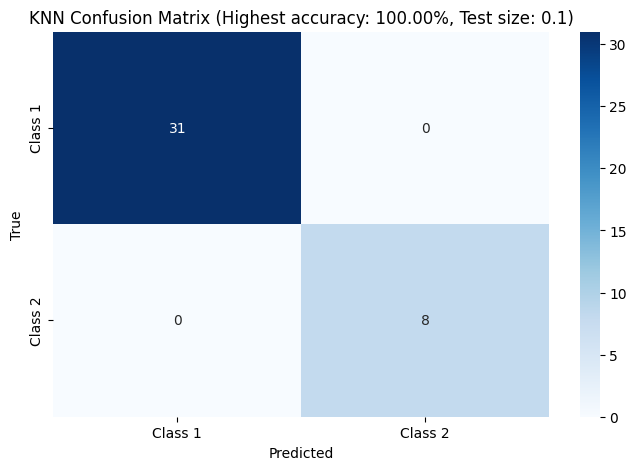


Test size: 0.2
  Accuracy of knn for simulation1 : 93.51%
  Accuracy of knn for simulation2 : 93.51%
  Accuracy of knn for simulation3 : 92.21%
  Accuracy of knn for simulation4 : 89.61%
  Accuracy of knn for simulation5 : 88.31%
  Accuracy of knn for simulation6 : 92.21%
  Accuracy of knn for simulation7 : 96.10%
  Accuracy of knn for simulation8 : 89.61%
  Accuracy of knn for simulation9 : 96.10%
  Accuracy of knn for simulation10 : 93.51%
  Accuracy of knn for simulation11 : 87.01%
  Accuracy of knn for simulation12 : 93.51%
  Accuracy of knn for simulation13 : 93.51%
  Accuracy of knn for simulation14 : 90.91%
  Accuracy of knn for simulation15 : 90.91%
  Accuracy of knn for simulation16 : 90.91%
  Accuracy of knn for simulation17 : 89.61%
  Accuracy of knn for simulation18 : 90.91%
  Accuracy of knn for simulation19 : 88.31%
  Accuracy of knn for simulation20 : 93.51%
  Accuracy of knn for simulation21 : 93.51%

Mean Accuracy: 91.77%
Variance of Accuracy: 5.84
Standard Deviation 

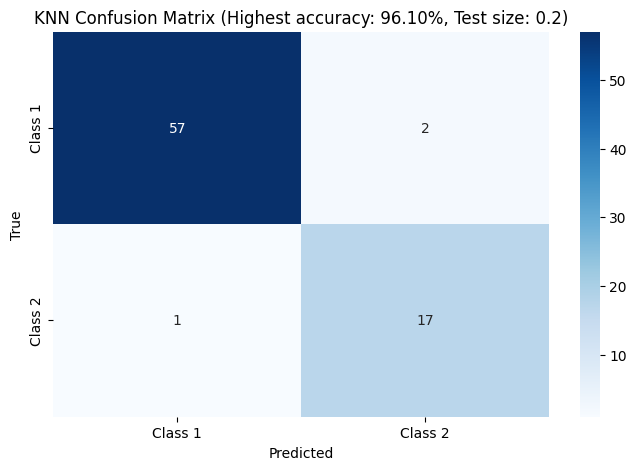


Test size: 0.3
  Accuracy of knn for simulation1 : 91.30%
  Accuracy of knn for simulation2 : 95.65%
  Accuracy of knn for simulation3 : 91.30%
  Accuracy of knn for simulation4 : 92.17%
  Accuracy of knn for simulation5 : 92.17%
  Accuracy of knn for simulation6 : 90.43%
  Accuracy of knn for simulation7 : 86.96%
  Accuracy of knn for simulation8 : 91.30%
  Accuracy of knn for simulation9 : 93.91%
  Accuracy of knn for simulation10 : 91.30%
  Accuracy of knn for simulation11 : 93.04%
  Accuracy of knn for simulation12 : 90.43%
  Accuracy of knn for simulation13 : 91.30%
  Accuracy of knn for simulation14 : 92.17%
  Accuracy of knn for simulation15 : 88.70%
  Accuracy of knn for simulation16 : 88.70%
  Accuracy of knn for simulation17 : 94.78%
  Accuracy of knn for simulation18 : 87.83%
  Accuracy of knn for simulation19 : 95.65%
  Accuracy of knn for simulation20 : 91.30%
  Accuracy of knn for simulation21 : 90.43%

Mean Accuracy: 91.47%
Variance of Accuracy: 5.16
Standard Deviation 

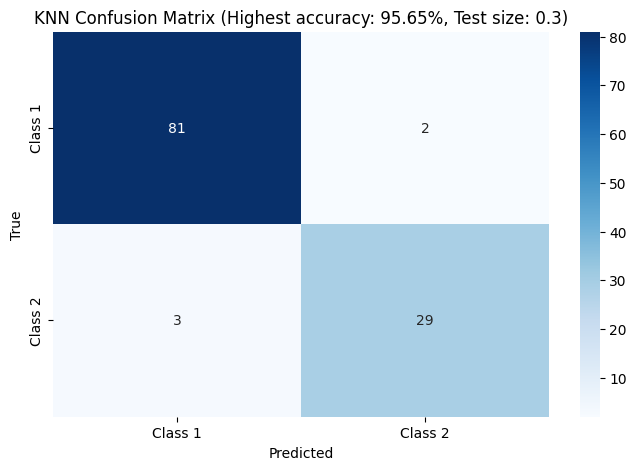

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:
    accuracies=[]
    highest_accuracy=0
    best_knn_cm = None
    print(f"\nTest size: {test_size}")

    for i in range(21):
        random_s=np.random.randint(0,100)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_s)

        # using MinMaxScaler()
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        # K-nearest neighbors
        knn_model = KNeighborsClassifier(n_neighbors=7)
        knn_model.fit(x_train_scaled, y_train)

        # Predict using the trained model
        predicted_knn = knn_model.predict(x_test_scaled)
        expected = y_test

        # Calculate accuracy score
        accuracy = accuracy_score(expected, predicted_knn) * 100
        accuracies.append(accuracy)
        print(f'  Accuracy of knn for simulation{i+1} : {accuracy:.2f}%')

        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            best_knn_cm = confusion_matrix(y_test, predicted_knn)

        #classification report of knn
        knn_cr=classification_report(y_test,predicted_knn)

    #Calculate and print mean, variance, and standard deviation
    mean_accuracy = np.mean(accuracies)
    variance_accuracy = np.var(accuracies)
    std_dev_accuracy = np.std(accuracies)

    print(f'\nMean Accuracy: {mean_accuracy:.2f}%')
    print(f'Variance of Accuracy: {variance_accuracy:.2f}')
    print(f'Standard Deviation of Accuracy: {std_dev_accuracy:.2f}\n')
    print(f"Confusion Matrix for the highest accuracy ({highest_accuracy:.2f}%):")
    print(best_knn_cm)
    print(f"Classification Report:")
    print(knn_cr)

    #plot confusion matrix of knn
    plt.figure(figsize=(8, 5))
    sns.heatmap(best_knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
    plt.title(f'KNN Confusion Matrix (Highest accuracy: {highest_accuracy:.2f}%, Test size: {test_size})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()